<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [20]:
# Read CSV
wine_csv = 'winequality_merged.csv'
df = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [21]:
# ANSWER
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [22]:
#try pandas profiling (need to install in jupyter)
import pandas as pd
from pandas_profiling import ProfileReport

In [54]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [55]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
df = df.drop_duplicates()

In [61]:
df = df.dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [63]:
df.describe().T #to look at the information #df.describe().T to make it easier to see

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


In [64]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
fixed acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092,0.486253
volatile acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205,0.645335
citric acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954,-0.183759
residual sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830,-0.328695
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137,0.499517
free sulfur dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002,-0.465326
total sulfur dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296,-0.694229
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434,0.429377
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733,0.310919
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884,0.490364


<AxesSubplot:>

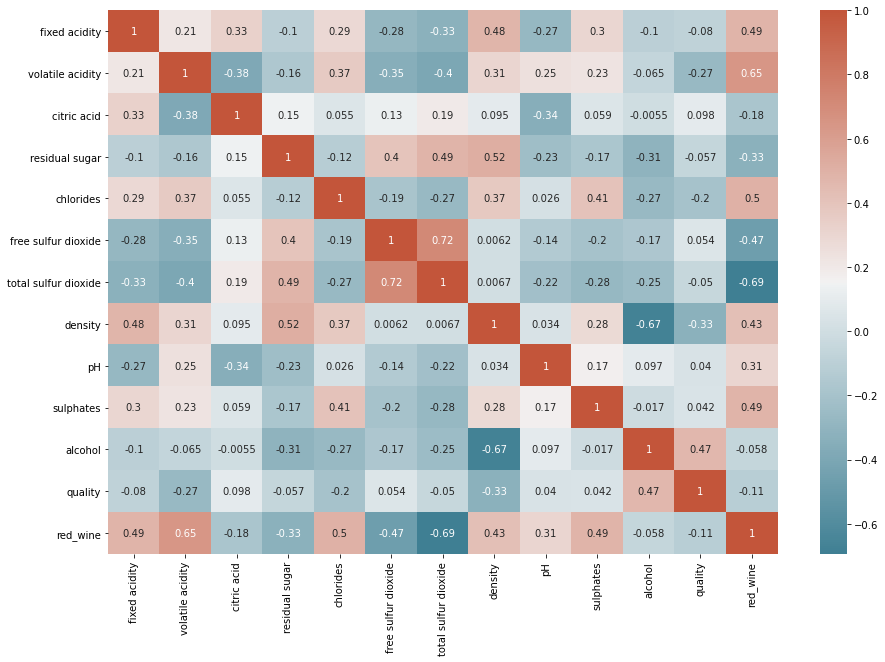

In [65]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

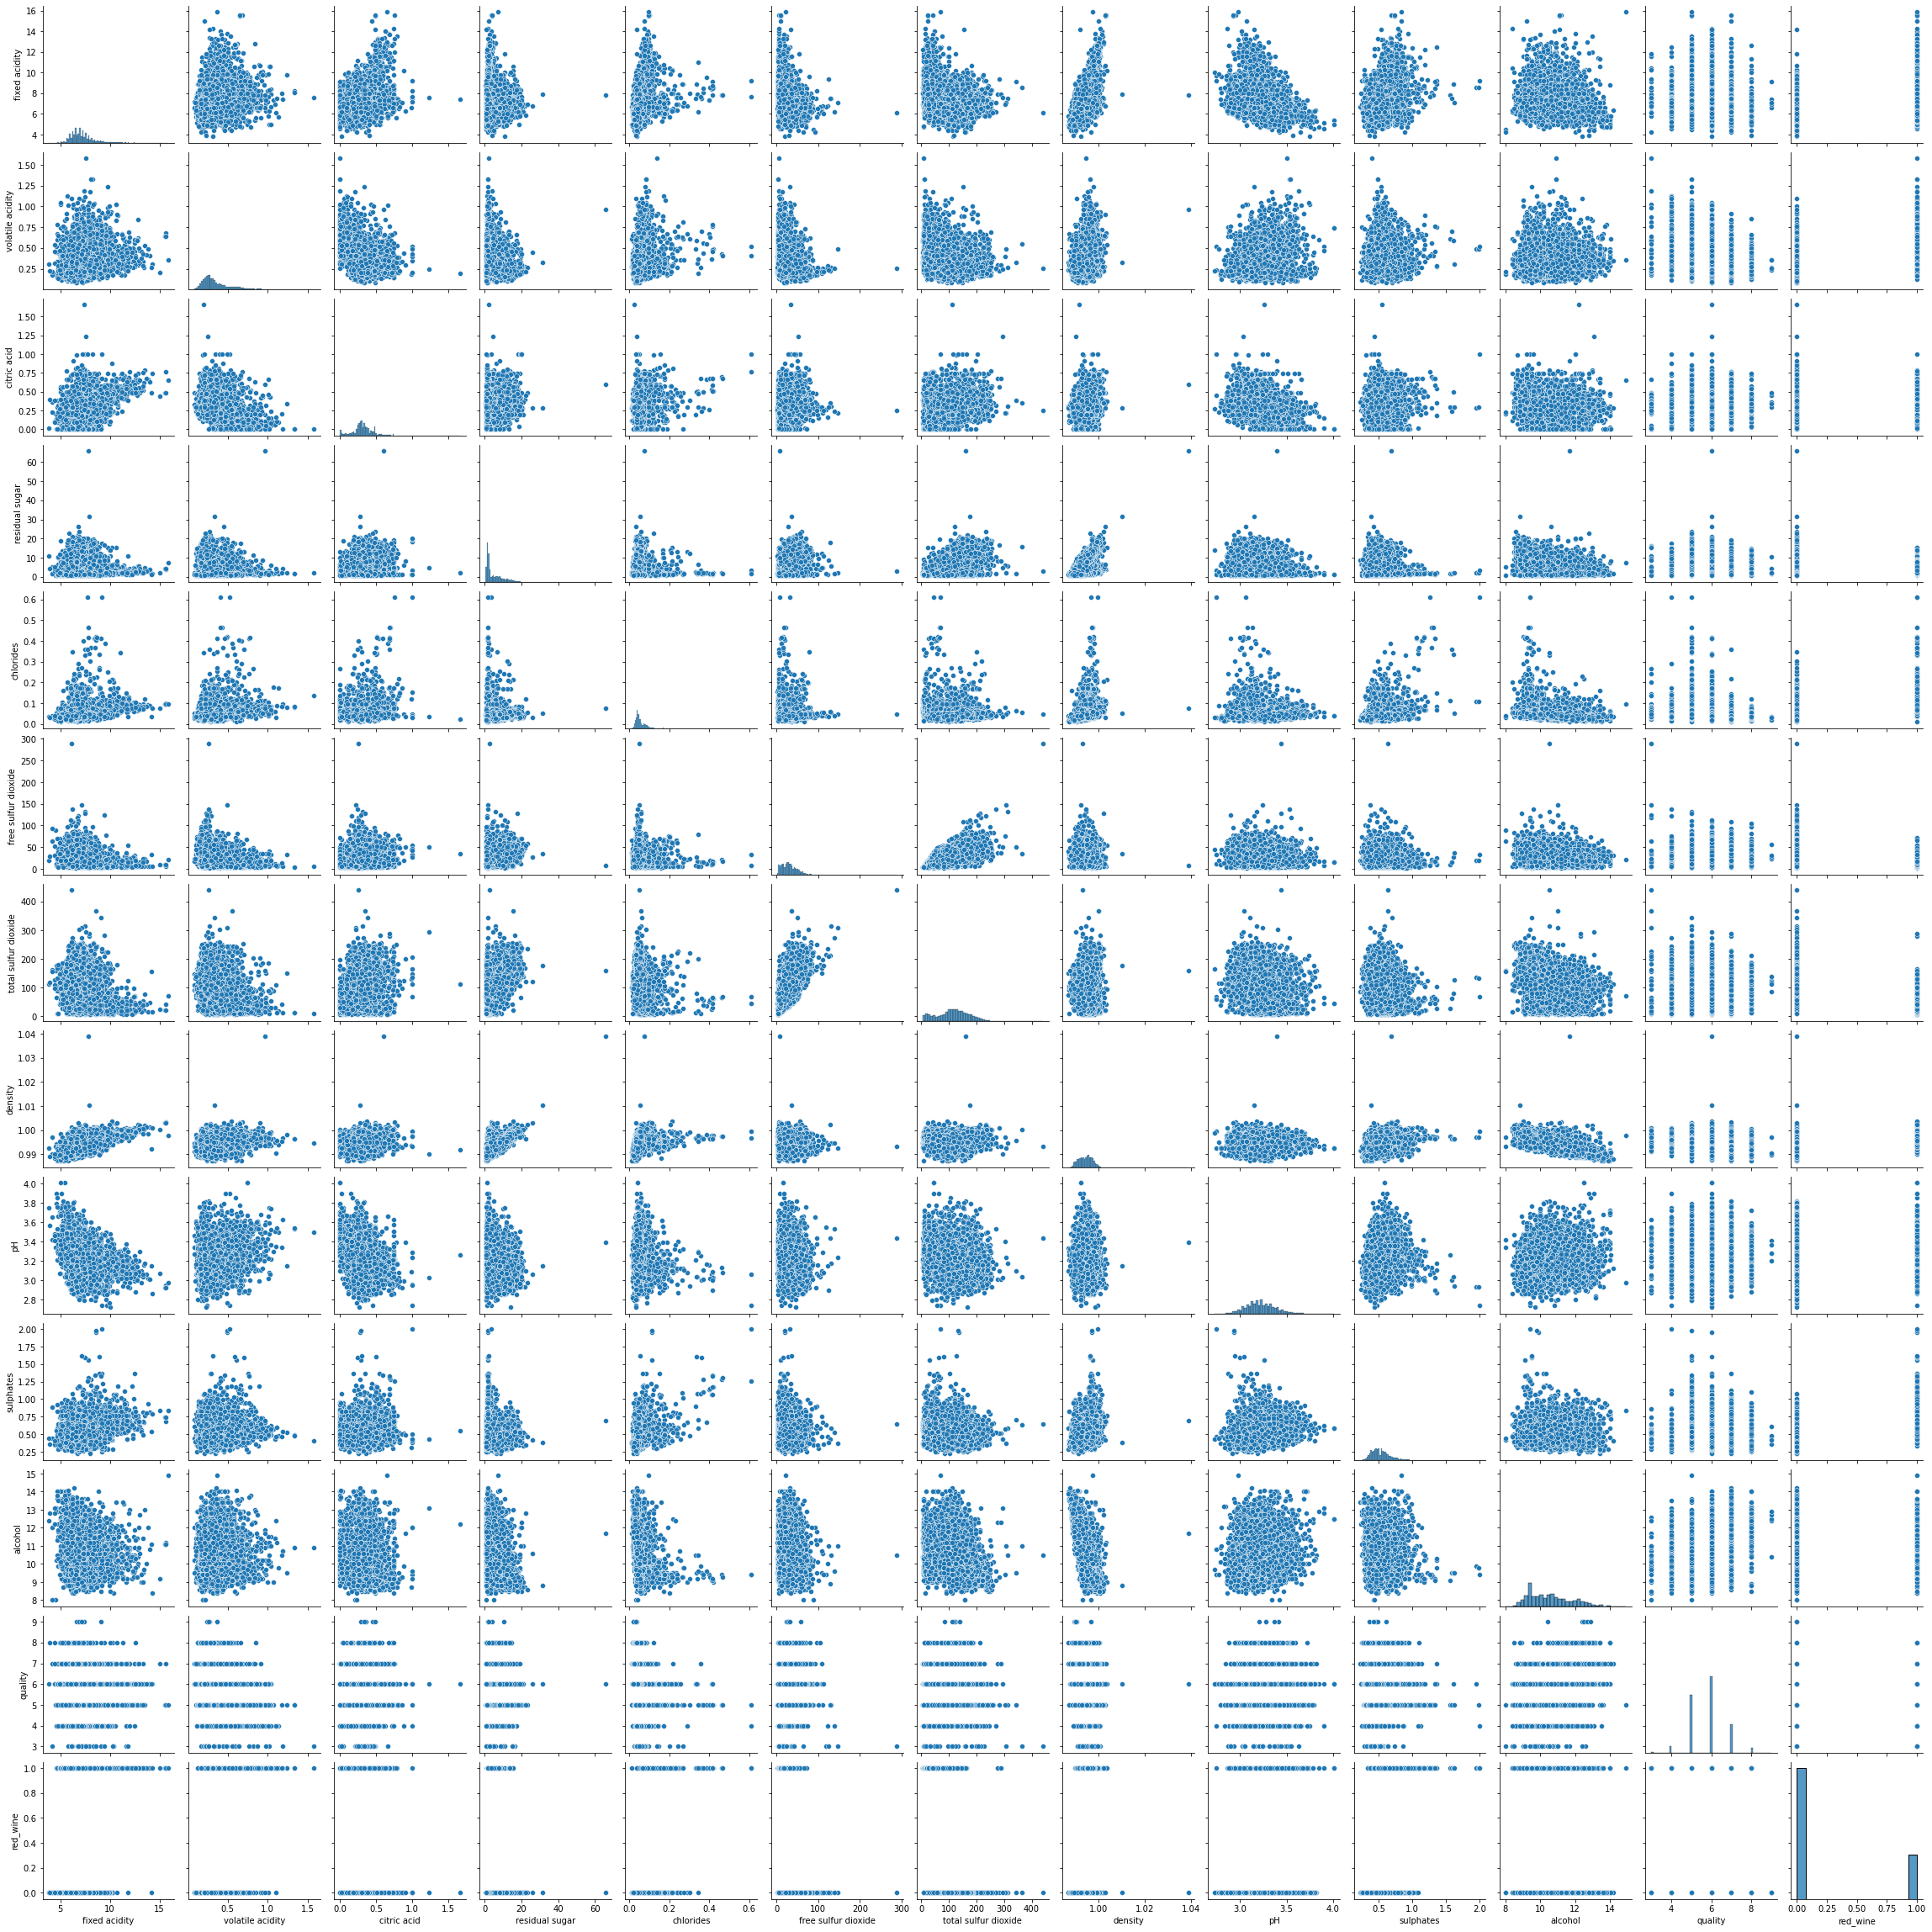

In [66]:
sns.pairplot(df)

### 2. Set Target Variable

Create a target variable for wine quality.

In [67]:
# Target Variable
# quality as we are looking for wine quality
X = df['alcohol'].values.reshape(-1,1) 

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [68]:
# ANSWER
y = df['quality']

### 4. Using Linear Regression Create a Model and Test Score

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [70]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
# Create a model for Linear Regression
lm = LinearRegression(n_jobs=1)

# Fit the model with the Training data
lm.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
r2_train = lm.score(X_train, y_train)
print("R^2 for Regression (Training Data): ", r2_train)

# Calculate the score (R^2 for Regression) for Testing Data
r2_test = lm.score(X_test, y_test)
print("R^2 for Regression (Testing Data): ", r2_test)

R^2 for Regression (Training Data):  0.22009591329743028
R^2 for Regression (Testing Data):  0.22042580673962653


### BONUS: Cross validation

In [72]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [73]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Fit model with training set
    lm.fit(X_train, y_train)
    
    # Make predictions with training and test set
    #model = LinearRegression().fit(X,Y)
   # pred = [[1204]]
   # y_pred = model1.predict(pred)
   # y_pred

    
    # Score R2 and RMSE on training and test sets and store in list
    
# Create a metrics_df dataframe to display r2 and rmse scores

In [ ]:
#>>> import numpy as np
#>>> from sklearn.model_selection import KFold
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([1, 2, 3, 4])
>>> kf = KFold(n_splits=2)
>>> kf.get_n_splits(X)
2
>>> print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
>>> for train_index, test_index in kf.split(X):
...     print("TRAIN:", train_index, "TEST:", test_index)
...     X_train, X_test = X[train_index], X[test_index]
...     y_train, y_test = y[train_index], y[test_index]
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]

In [ ]:
# Describe the metrics

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

In [ ]:
#R^2 for Regression (Testing Data):  0.22042580673962653
# 1 feature selected, maybe

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['density'].values.reshape(-1,1) 
y = df['quality']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a model for Linear Regression
lm = LinearRegression(n_jobs=1)

# Fit the model with the Training data
lm.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
r2_train = lm.score(X_train, y_train)
print("R^2 for Regression (Training Data): ", r2_train)

# Calculate the score (R^2 for Regression) for Testing Data
r2_test = lm.score(X_test, y_test)
print("R^2 for Regression (Testing Data): ", r2_test)

R^2 for Regression (Training Data):  0.1047700007747866
R^2 for Regression (Testing Data):  0.1126725584801136


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['fixed acidity'].values.reshape(-1,1) 
y = df['quality']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a model for Linear Regression
lm = LinearRegression(n_jobs=1)

# Fit the model with the Training data
lm.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
r2_train = lm.score(X_train, y_train)
print("R^2 for Regression (Training Data): ", r2_train)

# Calculate the score (R^2 for Regression) for Testing Data
r2_test = lm.score(X_test, y_test)
print("R^2 for Regression (Testing Data): ", r2_test)

R^2 for Regression (Training Data):  0.0059819759850811005
R^2 for Regression (Testing Data):  0.00703235755995657


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['residual sugar'].values.reshape(-1,1) 
y = df['quality']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a model for Linear Regression
lm = LinearRegression(n_jobs=1)

# Fit the model with the Training data
lm.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
r2_train = lm.score(X_train, y_train)
print("R^2 for Regression (Training Data): ", r2_train)

# Calculate the score (R^2 for Regression) for Testing Data
r2_test = lm.score(X_test, y_test)
print("R^2 for Regression (Testing Data): ", r2_test)

R^2 for Regression (Training Data):  0.003542148671445866
R^2 for Regression (Testing Data):  0.0008263508086759908


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df['pH'].values.reshape(-1,1) 
y = df['quality']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a model for Linear Regression
lm = LinearRegression(n_jobs=1)

# Fit the model with the Training data
lm.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
r2_train = lm.score(X_train, y_train)
print("R^2 for Regression (Training Data): ", r2_train)

# Calculate the score (R^2 for Regression) for Testing Data
r2_test = lm.score(X_test, y_test)
print("R^2 for Regression (Testing Data): ", r2_test)

R^2 for Regression (Training Data):  0.0006448282283005868
R^2 for Regression (Testing Data):  0.0032754071884244507


**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



